# NBA Shot Charts

In [1]:
#Import Data and NBA_API
#py -m pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, gaussian_kde, percentileofscore

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats
from matplotlib.patches import Circle, Rectangle, Arc

## Shot Chart Detail function using NBA_API

In [2]:
def get_player_shotchartdetail(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2020-21
    """
    
    # player dictionary
    #[{'id': , 'full_name': , 'first_name': , 'last_name': , 'is_active': }, ......... ,{'id': , 'full_name': , 'first_name': , 'last_name': , 'is_active': }]
    nba_players = players.get_players()

    #{'id': 1628369, 'full_name': 'Jayson Tatum', 'first_name': 'Jayson', 'last_name': 'Tatum', 'is_active': True}
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career stats df
    career = playercareerstats.PlayerCareerStats(player_id = player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]


In [64]:
# 2021-22 NBA regular season MVP
player_shotchart_df, league_avg = get_player_shotchartdetail('Nikola Jokic', '2021-22')

# 2022-23 NBA regular season MVP
player_shotchart_df2, league_avg2 = get_player_shotchartdetail('Joel Embiid', '2022-23')

In [57]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100012,7,203999,Nikola Jokic,1610612743,Denver Nuggets,1,11,45,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,18,43,179,1,1,20211020,PHX,DEN
1,Shot Chart Detail,0022100012,42,203999,Nikola Jokic,1610612743,Denver Nuggets,1,8,8,Made Shot,Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-5,1,1,1,20211020,PHX,DEN
2,Shot Chart Detail,0022100012,67,203999,Nikola Jokic,1610612743,Denver Nuggets,1,5,35,Made Shot,Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-61,38,1,1,20211020,PHX,DEN
3,Shot Chart Detail,0022100012,73,203999,Nikola Jokic,1610612743,Denver Nuggets,1,5,9,Made Shot,Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,7,62,1,1,20211020,PHX,DEN
4,Shot Chart Detail,0022100012,77,203999,Nikola Jokic,1610612743,Denver Nuggets,1,4,39,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,38,248,1,0,20211020,PHX,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Shot Chart Detail,0022101201,582,203999,Nikola Jokic,1610612743,Denver Nuggets,4,5,51,Missed Shot,Turnaround Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,16,33,1,0,20220407,DEN,MEM
1307,Shot Chart Detail,0022101201,586,203999,Nikola Jokic,1610612743,Denver Nuggets,4,5,20,Made Shot,Turnaround Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-22,23,1,1,20220407,DEN,MEM
1308,Shot Chart Detail,0022101201,600,203999,Nikola Jokic,1610612743,Denver Nuggets,4,4,28,Missed Shot,Turnaround Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,9,26,1,0,20220407,DEN,MEM
1309,Shot Chart Detail,0022101201,602,203999,Nikola Jokic,1610612743,Denver Nuggets,4,4,26,Made Shot,Putback Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20220407,DEN,MEM


In [58]:
player_shotchart_df2

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200001,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,38,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-118,50,1,0,20221018,BOS,PHI
1,Shot Chart Detail,0022200001,17,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,10,33,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,116,241,1,0,20221018,BOS,PHI
2,Shot Chart Detail,0022200001,203,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,11,33,Made Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,17,7,174,1,1,20221018,BOS,PHI
3,Shot Chart Detail,0022200001,236,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,9,9,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-174,218,1,0,20221018,BOS,PHI
4,Shot Chart Detail,0022200001,286,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,4,17,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,134,226,1,1,20221018,BOS,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Shot Chart Detail,0022201198,272,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,2,43,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,4,8,1,1,20230406,PHI,MIA
1324,Shot Chart Detail,0022201198,290,203954,Joel Embiid,1610612755,Philadelphia 76ers,2,0,2,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,14,-89,114,1,0,20230406,PHI,MIA
1325,Shot Chart Detail,0022201198,320,203954,Joel Embiid,1610612755,Philadelphia 76ers,3,9,7,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,16,47,157,1,1,20230406,PHI,MIA
1326,Shot Chart Detail,0022201198,361,203954,Joel Embiid,1610612755,Philadelphia 76ers,3,5,36,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-31,2,1,1,20230406,PHI,MIA


In [62]:
for i in [player_shotchart_df, player_shotchart_df2]: 
    print(i.isnull().any().any())


False
False


In [71]:
league_avg, league_avg2

(          GRID_TYPE        SHOT_ZONE_BASIC         SHOT_ZONE_AREA  \
 0   League Averages      Above the Break 3         Back Court(BC)   
 1   League Averages      Above the Break 3              Center(C)   
 2   League Averages      Above the Break 3   Left Side Center(LC)   
 3   League Averages      Above the Break 3  Right Side Center(RC)   
 4   League Averages              Backcourt         Back Court(BC)   
 5   League Averages  In The Paint (Non-RA)              Center(C)   
 6   League Averages  In The Paint (Non-RA)              Center(C)   
 7   League Averages  In The Paint (Non-RA)           Left Side(L)   
 8   League Averages  In The Paint (Non-RA)          Right Side(R)   
 9   League Averages          Left Corner 3           Left Side(L)   
 10  League Averages              Mid-Range              Center(C)   
 11  League Averages              Mid-Range              Center(C)   
 12  League Averages              Mid-Range   Left Side Center(LC)   
 13  League Averages

# draw court function

In [46]:
def draw_court(ax=None, lw = 1, color="darkcyan", shotzone=False, outer_lines=False):
# One foot equals +/-10 units on the x and y-axis.

    if ax == None:
        ax = plt.gca()

    # Create various elements in NBA basketball court

    # Hoop 
    hoop = Circle((0,0), radius=7.5, lw = lw, color = color, fill = False)

    # Backboard(3 feet from baseline)
    backboard = Rectangle((-30,-12.5),60,0, lw=lw, color=color, fill=False)

    # Paint(Outer width = 16feet, Inner width = 12feet, height of paint is 16 feet from backboard)
    inner_box = Rectangle((-60, -47.5), 120, 190, lw=lw, color=color, fill=False)
    outer_box = Rectangle((-80, -47.5), 160, 190, lw=lw, color=color, fill=False)
    
    # Free Throw(Diameter = 12 feet, draw arc from theta2 to theta1 by counterclockwise)
    top_ft_arc = Arc((0,142.5), 120, 120, theta1=0, theta2=180, lw=lw, color=color, fill=False )
    bottom_ft_arc = Arc((0,142.5), 120, 120, theta1=180, theta2=0, lw=lw, color=color, linestyle='dashed' )

    # Restricted Zone
    restricted = Arc((0, -12), 80, 80, theta1=0, theta2=180,  lw=lw, color=color)

    # Three Point Line
    # corner 3pt line is 22 feet away from rim
    right_corner = Rectangle((-220,-47.5), 0, 140, lw=lw, color=color)
    left_corner = Rectangle((220,-47.5), 0, 140, lw=lw, color=color)
    # outside 3pt line is 23.9 feet away from rim
    three_arc = Arc((0,0), 475, 475, theta1=22, theta2= 158, lw=lw, color=color, fill= False)

    # Center court (outer circle has 12feet diameter and inner circle has 4feet diameter)
    outer_arc = Arc((0,422.5), 120, 120, theta1=180, theta2=0, lw=lw, color=color )
    inner_arc = Arc((0,422.5), 40, 40, theta1=180, theta2=0, lw=lw, color=color )

    # add court elements into axes
    court_elements = [hoop, backboard, inner_box, outer_box, top_ft_arc, bottom_ft_arc, restricted, right_corner, left_corner, three_arc, outer_arc, inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        
    return ax

## Shot Chart Function

In [47]:
def shot_chart(data, title="", color="b", xlim=(-250, 250), ylim=(422.5, -47.5), line_color="darkcyan", court_color="white", court_lw=1.5, outer_lines=False,
               flip_court=False, gridsize=None, ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    # Get rid of axis labels and tick marks
    ax.tick_params(labelbottom=False, labelleft=False, left = False, bottom = False)
    ax.set_title(title, fontsize=25)

    # Add Data Scource and Author
    ax.text(-250,445,'Data Source: https://github.com/swar/nba_api''\nAuthor: God-ass', fontsize=9)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss  (similar to excel lookup function)  
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, color='red', marker="x", s=10, linewidths=1, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='green', marker="o", s=10, linewidths=1, **kwargs)

        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [48]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

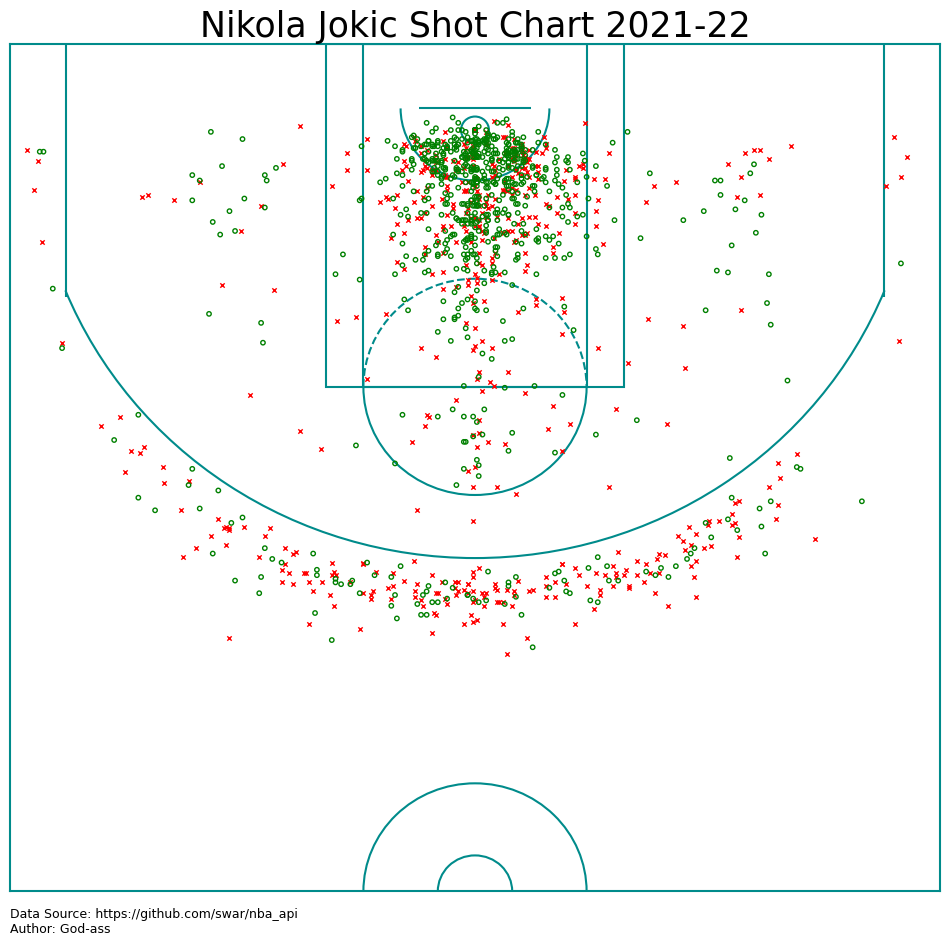


-----Nikola Jokic Scoring Stats 2021-22-----
FG%:  58.28% (764/1311)
league_avg FG%: 46.11%
Total points:  1625
Points per game:  21.96

-------FG% per Zone-------
Mid-Range : 53.54% (68/127)
Restricted Area : 71.87% (350/487)
In The Paint (Non-RA) : 60.88% (249/409)
Above the Break 3 : 34.31% (94/274)
Right Corner 3 : 20.00% (1/5)
Left Corner 3 : 33.33% (2/6)
Backcourt : 0.00% (0/3)

-------league average FG% per Zone-------
Above the Break 3 : 34.60% (22299/64447)
Backcourt : 2.50% (11/440)
In The Paint (Non-RA) : 42.83% (16990/39668)
Left Corner 3 : 38.42% (4371/11377)
Mid-Range : 40.65% (11264/27712)
Restricted Area : 65.32% (41140/62987)
Right Corner 3 : 38.20% (3855/10091)

-------FG% per Play-------
Driving Reverse Layup Shot : 100.00% (7/7)
Running Dunk Shot : 100.00% (10/10)
Dunk Shot : 100.00% (4/4)
Driving Dunk Shot : 100.00% (5/5)
Running Reverse Layup Shot : 100.00% (1/1)
Running Finger Roll Layup Shot : 88.89% (8/9)
Finger Roll Layup Shot : 86.36% (19/22)
Driving Finger 

In [84]:
shot_chart(player_shotchart_df, title="Nikola Jokic Shot Chart 2021-22")
plt.show()  
print("")
print("-----Nikola Jokic Scoring Stats 2021-22-----")
print("FG%: ", "{} {}".format("{:.2%}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}/{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df))))
print("league_avg FG%: {:.2%}".format(league_avg['FGM'].sum()/league_avg['FGA'].sum()))
print("Total points: ", "{}".format(player_shotchart_df[player_shotchart_df['SHOT_TYPE']=='3PT Field Goal']['SHOT_MADE_FLAG'].sum()*3 + player_shotchart_df[player_shotchart_df['SHOT_TYPE']=='2PT Field Goal']['SHOT_MADE_FLAG'].sum()*2))
print("Points per game: ", "{}".format(round(((player_shotchart_df[player_shotchart_df['SHOT_TYPE']=='3PT Field Goal']['SHOT_MADE_FLAG'].sum()*3 + player_shotchart_df[player_shotchart_df['SHOT_TYPE']=='2PT Field Goal']['SHOT_MADE_FLAG'].sum()*2))/len(player_shotchart_df['GAME_ID'].unique()),2)))
print("")

print("-------FG% per Zone-------")
shot_zone_basic = list(player_shotchart_df['SHOT_ZONE_BASIC'].unique())
for zone in shot_zone_basic:
    print(zone,":", "{} {}".format("{:.2%}".format(((player_shotchart_df[player_shotchart_df['SHOT_ZONE_BASIC']==zone]['SHOT_MADE_FLAG'].sum()))/((player_shotchart_df[player_shotchart_df['SHOT_ZONE_BASIC']==zone]['SHOT_ATTEMPTED_FLAG'].sum()))), "({0}/{1})".format((player_shotchart_df[player_shotchart_df['SHOT_ZONE_BASIC']==zone]['SHOT_MADE_FLAG'].sum()),player_shotchart_df[player_shotchart_df['SHOT_ZONE_BASIC']==zone]['SHOT_ATTEMPTED_FLAG'].sum())))
print("")

print("-------league average FG% per Zone-------")
shot_zone_basic = list(league_avg['SHOT_ZONE_BASIC'].unique())
for zone in shot_zone_basic:
    print(zone,":", "{} {}".format("{:.2%}".format(((league_avg[league_avg['SHOT_ZONE_BASIC']==zone]['FGM'].sum()))/((league_avg[league_avg['SHOT_ZONE_BASIC']==zone]['FGA'].sum()))), "({0}/{1})".format((league_avg[league_avg['SHOT_ZONE_BASIC']==zone]['FGM'].sum()),league_avg[league_avg['SHOT_ZONE_BASIC']==zone]['FGA'].sum())))
print("")

print("-------FG% per Play-------")
action_type = list(player_shotchart_df['ACTION_TYPE'].unique())
action_fg = []
for action in action_type:
    fg = ((player_shotchart_df[player_shotchart_df['ACTION_TYPE']==action]['SHOT_MADE_FLAG'].sum()))/((player_shotchart_df[player_shotchart_df['ACTION_TYPE']==action]['SHOT_ATTEMPTED_FLAG'].sum()))
    action_fg.append((action, fg))
sorted_action_fg = sorted(action_fg, key=lambda x: x[1], reverse=True)
for action, fg in sorted_action_fg:
    print(action,":", "{} {}".format("{:.2%}".format(fg),"({0}/{1})".format(player_shotchart_df[player_shotchart_df['ACTION_TYPE']==action]['SHOT_MADE_FLAG'].sum(),player_shotchart_df[player_shotchart_df['ACTION_TYPE']==action]['SHOT_ATTEMPTED_FLAG'].sum())))



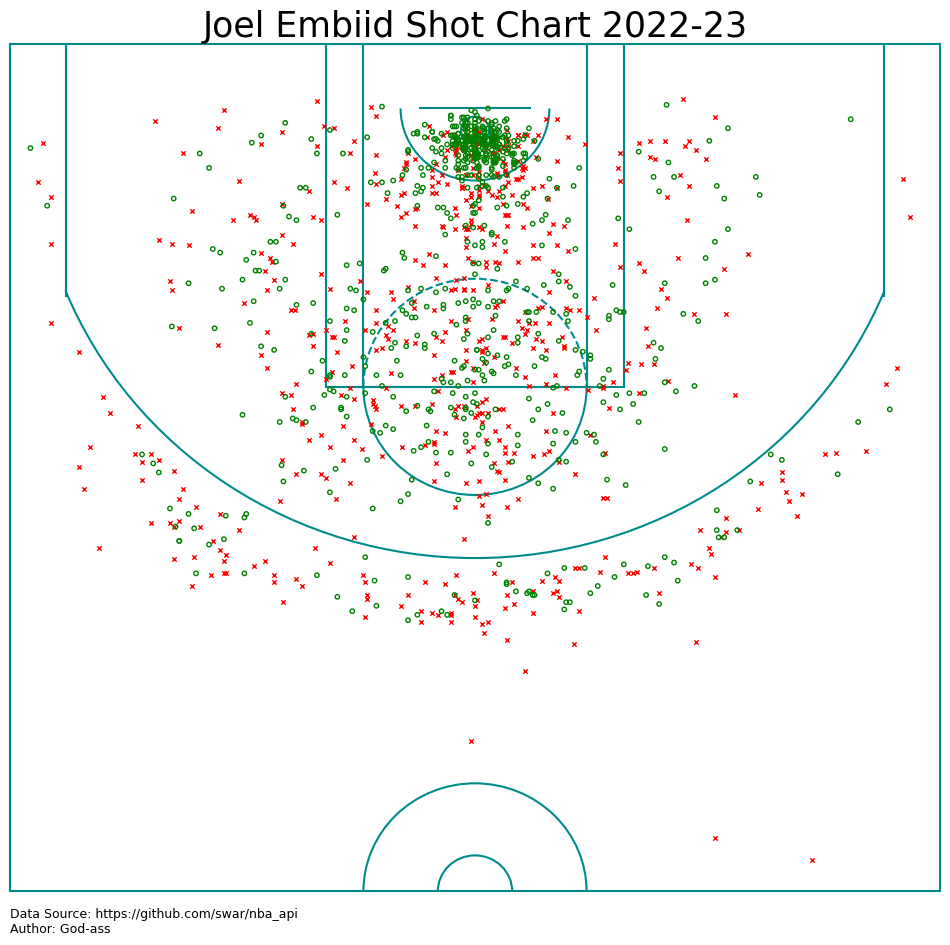


-----Joel Embiid Scoring Stats 2022-23-----
FG%:  54.82% (728/1328)
league_avg FG%: 47.54%
Total points:  1522
Points per game:  23.06

-------FG% per Zone-------
Mid-Range : 48.72% (171/351)
Above the Break 3 : 34.04% (64/188)
In The Paint (Non-RA) : 49.01% (174/355)
Restricted Area : 75.12% (317/422)
Backcourt : 0.00% (0/4)
Left Corner 3 : 33.33% (2/6)
Right Corner 3 : 0.00% (0/2)

-------league average FG% per Zone-------
Above the Break 3 : 35.45% (22201/62625)
Backcourt : 2.46% (10/406)
In The Paint (Non-RA) : 44.36% (18827/42441)
Left Corner 3 : 38.51% (4262/11066)
Mid-Range : 42.05% (10831/25760)
Restricted Area : 66.63% (43298/64983)
Right Corner 3 : 38.55% (3831/9939)

-------FG% per Play-------
Alley Oop Dunk Shot : 100.00% (6/6)
Running Reverse Layup Shot : 100.00% (3/3)
Putback Layup Shot : 100.00% (18/18)
Driving Bank Hook Shot : 100.00% (1/1)
Running Dunk Shot : 100.00% (13/13)
Finger Roll Layup Shot : 100.00% (4/4)
Putback Dunk Shot : 100.00% (2/2)
Driving Reverse Dunk 

In [86]:
shot_chart(player_shotchart_df2, title="Joel Embiid Shot Chart 2022-23")
plt.show()  

print("")
print("-----Joel Embiid Scoring Stats 2022-23-----")
print("FG%: ", "{} {}".format("{:.2%}".format(player_shotchart_df2['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df2)), "({0}/{1})".format(player_shotchart_df2['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df2))))
print("league_avg FG%: {:.2%}".format(league_avg2['FGM'].sum()/league_avg2['FGA'].sum()))
print("Total points: ", "{}".format(player_shotchart_df2[player_shotchart_df2['SHOT_TYPE']=='3PT Field Goal']['SHOT_MADE_FLAG'].sum()*3 + player_shotchart_df2[player_shotchart_df2['SHOT_TYPE']=='2PT Field Goal']['SHOT_MADE_FLAG'].sum()*2))
print("Points per game: ", "{}".format(round(((player_shotchart_df2[player_shotchart_df2['SHOT_TYPE']=='3PT Field Goal']['SHOT_MADE_FLAG'].sum()*3 + player_shotchart_df2[player_shotchart_df2['SHOT_TYPE']=='2PT Field Goal']['SHOT_MADE_FLAG'].sum()*2))/len(player_shotchart_df2['GAME_ID'].unique()),2)))
print("")

print("-------FG% per Zone-------")
shot_zone_basic = list(player_shotchart_df2['SHOT_ZONE_BASIC'].unique())
for zone in shot_zone_basic:
    print(zone,":", "{} {}".format("{:.2%}".format(((player_shotchart_df2[player_shotchart_df2['SHOT_ZONE_BASIC']==zone]['SHOT_MADE_FLAG'].sum()))/((player_shotchart_df2[player_shotchart_df2['SHOT_ZONE_BASIC']==zone]['SHOT_ATTEMPTED_FLAG'].sum()))), "({0}/{1})".format((player_shotchart_df2[player_shotchart_df2['SHOT_ZONE_BASIC']==zone]['SHOT_MADE_FLAG'].sum()),player_shotchart_df2[player_shotchart_df2['SHOT_ZONE_BASIC']==zone]['SHOT_ATTEMPTED_FLAG'].sum())))
print("")

print("-------league average FG% per Zone-------")
shot_zone_basic = list(league_avg['SHOT_ZONE_BASIC'].unique())
for zone in shot_zone_basic:
    print(zone,":", "{} {}".format("{:.2%}".format(((league_avg2[league_avg2['SHOT_ZONE_BASIC']==zone]['FGM'].sum()))/((league_avg2[league_avg2['SHOT_ZONE_BASIC']==zone]['FGA'].sum()))), "({0}/{1})".format((league_avg2[league_avg2['SHOT_ZONE_BASIC']==zone]['FGM'].sum()),league_avg2[league_avg2['SHOT_ZONE_BASIC']==zone]['FGA'].sum())))
print("")

print("-------FG% per Play-------")
action_type = list(player_shotchart_df2['ACTION_TYPE'].unique())
action_fg = []
for action in action_type:
    fg = ((player_shotchart_df2[player_shotchart_df2['ACTION_TYPE']==action]['SHOT_MADE_FLAG'].sum()))/((player_shotchart_df2[player_shotchart_df2['ACTION_TYPE']==action]['SHOT_ATTEMPTED_FLAG'].sum()))
    action_fg.append((action, fg))
sorted_action_fg = sorted(action_fg, key=lambda x: x[1], reverse=True)
for action, fg in sorted_action_fg:
    print(action,":", "{} {}".format("{:.2%}".format(fg),"({0}/{1})".format(player_shotchart_df2[player_shotchart_df2['ACTION_TYPE']==action]['SHOT_MADE_FLAG'].sum(),player_shotchart_df2[player_shotchart_df2['ACTION_TYPE']==action]['SHOT_ATTEMPTED_FLAG'].sum())))


